In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# параметры распределений
mu0, sigma0 = -2., 1.
mu1, sigma1 = 3., 2.

In [3]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [4]:
d0 = torch.distributions.Normal(torch.tensor([mu0]), torch.tensor([sigma0]))
d1 = torch.distributions.Normal(torch.tensor([mu1]), torch.tensor([sigma1]))

In [24]:
layer = nn.Linear(1, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([0.8095]), tensor(-0.5505)]


In [25]:
params = list(layer.parameters())
x = torch.tensor([1.])#.view(-1, 1)
y = layer(x)
params, params[0].shape, torch.t(params[0]).shape, params[1].shape, x, x.shape, y, y.shape

([Parameter containing:
  tensor([[0.8095]], requires_grad=True), Parameter containing:
  tensor([-0.5505], requires_grad=True)],
 torch.Size([1, 1]),
 torch.Size([1, 1]),
 torch.Size([1]),
 tensor([1.]),
 torch.Size([1]),
 tensor([0.2590], grad_fn=<ThAddBackward>),
 torch.Size([1]))

In [26]:
x.matmul(torch.t(params[0])) + params[1]

tensor([0.2590], grad_fn=<ThAddBackward>)

{'weight': Parameter containing:
tensor([[-0.0783]], requires_grad=True), 'bias': Parameter containing:
tensor([0.7598], requires_grad=True)}
tensor([0.6816], grad_fn=<ThAddBackward>)


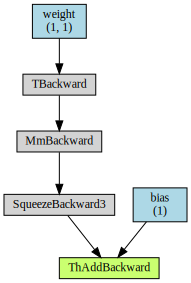

In [8]:
from torchviz import make_dot

y = layer(x)
named_params = dict(layer.named_parameters())
print(named_params)
print(y)
make_dot(y, named_params)

In [9]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x)) # F.sigmoid (deprecated)
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 0.860554
Ошибка после 1 итераций: 0.438596
Ошибка после 2 итераций: 0.314225
Ошибка после 3 итераций: 0.257061
Ошибка после 4 итераций: 0.225503
Ошибка после 5 итераций: 0.205127
Ошибка после 6 итераций: 0.189573
Ошибка после 7 итераций: 0.178937
Ошибка после 8 итераций: 0.171582
Ошибка после 9 итераций: 0.165910
Ошибка после 10 итераций: 0.161018
Ошибка после 11 итераций: 0.158112
Ошибка после 12 итераций: 0.152420
Ошибка после 13 итераций: 0.152036
Ошибка после 14 итераций: 0.148294
Ошибка после 15 итераций: 0.146616
Ошибка после 16 итераций: 0.144629
Ошибка после 17 итераций: 0.141894
Ошибка после 18 итераций: 0.142482
Ошибка после 19 итераций: 0.140505


In [10]:
x_scale = np.linspace(-10, 10, 5000)
d0_pdf = stats.norm.pdf(x_scale, mu0, sigma0) 
d1_pdf = stats.norm.pdf(x_scale, mu1, sigma1)
x_tensor = torch.tensor(x_scale.reshape(-1, 1), dtype=torch.float)
with torch.no_grad():
    dist = torch.sigmoid(layer(x_tensor)).numpy()
ratio = d1_pdf / (d1_pdf + d0_pdf)

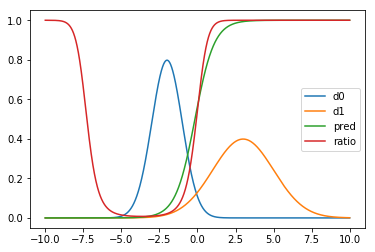

In [11]:
plt.plot(x_scale, d0_pdf*2, label='d0') # умножение на 2 для красоты графиков, на распределения не влияет
plt.plot(x_scale, d1_pdf*2, label='d1')
plt.plot(x_scale, dist.flatten(), label='pred')
plt.plot(x_scale, ratio, label='ratio')
plt.legend();

In [12]:
print([p.data[0] for p in layer.parameters()])

[tensor([1.5780]), tensor(0.2613)]


In [14]:
torch.log(torch.sigmoid(torch.tensor(-100.)))

tensor(-inf)

In [15]:
F.logsigmoid(torch.tensor(-100.))

tensor(-100.)